# Predicting fire damage

- In this project, we will be to predict the extent of fire damage to a forest. Our data comes from the Forest Fires dataset from the UCI Machine Learning Repository. This dataset contains information on fires, along with the resulting damage and associated meteorological data. We want to know how these characteristics might be useful in predicting future fire damage.
- You can download the dataset from [here.](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)

In [1]:
#importing main libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in the dataset
fires = pd.read_csv('fires.csv')
fires.head(10)

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0
5,6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0
6,7,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0
7,8,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0
8,9,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0
9,10,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0


Using the guidence page of the dataset to understand the meaning of each dataset

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

## Data prepration

first, we need to find out if there are any missing values in our dataset:

In [3]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    object 
 4   day         517 non-null    object 
 5   FFMC        469 non-null    float64
 6   DMC         496 non-null    float64
 7   DC          474 non-null    float64
 8   ISI         515 non-null    float64
 9   temp        496 non-null    float64
 10  RH          487 non-null    float64
 11  wind        482 non-null    float64
 12  rain        485 non-null    float64
 13  area        517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


based on the definiton of features, we might want to drop unnamed(which is purely a fallacy while importing the data), X and Y columns:

In [4]:
fires = fires.drop(columns = ['Unnamed: 0', 'X','Y'])
fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


then, we need to visualize the distribution of each feature vs. the target column to see how they interact with each other. finding the correlation of features with the target column is also another idea. 

In [5]:
#finding the correlation of features with the target column
fires.corr()['area']

FFMC    0.042449
DMC     0.073768
DC      0.046118
ISI     0.008417
temp    0.097828
RH     -0.077766
wind    0.007474
rain   -0.007981
area    1.000000
Name: area, dtype: float64

oops! correlation values are a little frustrating. no columns show any meaningful correlations with the target column. 
Nex, we need to investiage a little deeper, to find out if we can find any trends in the distribution of our columns:

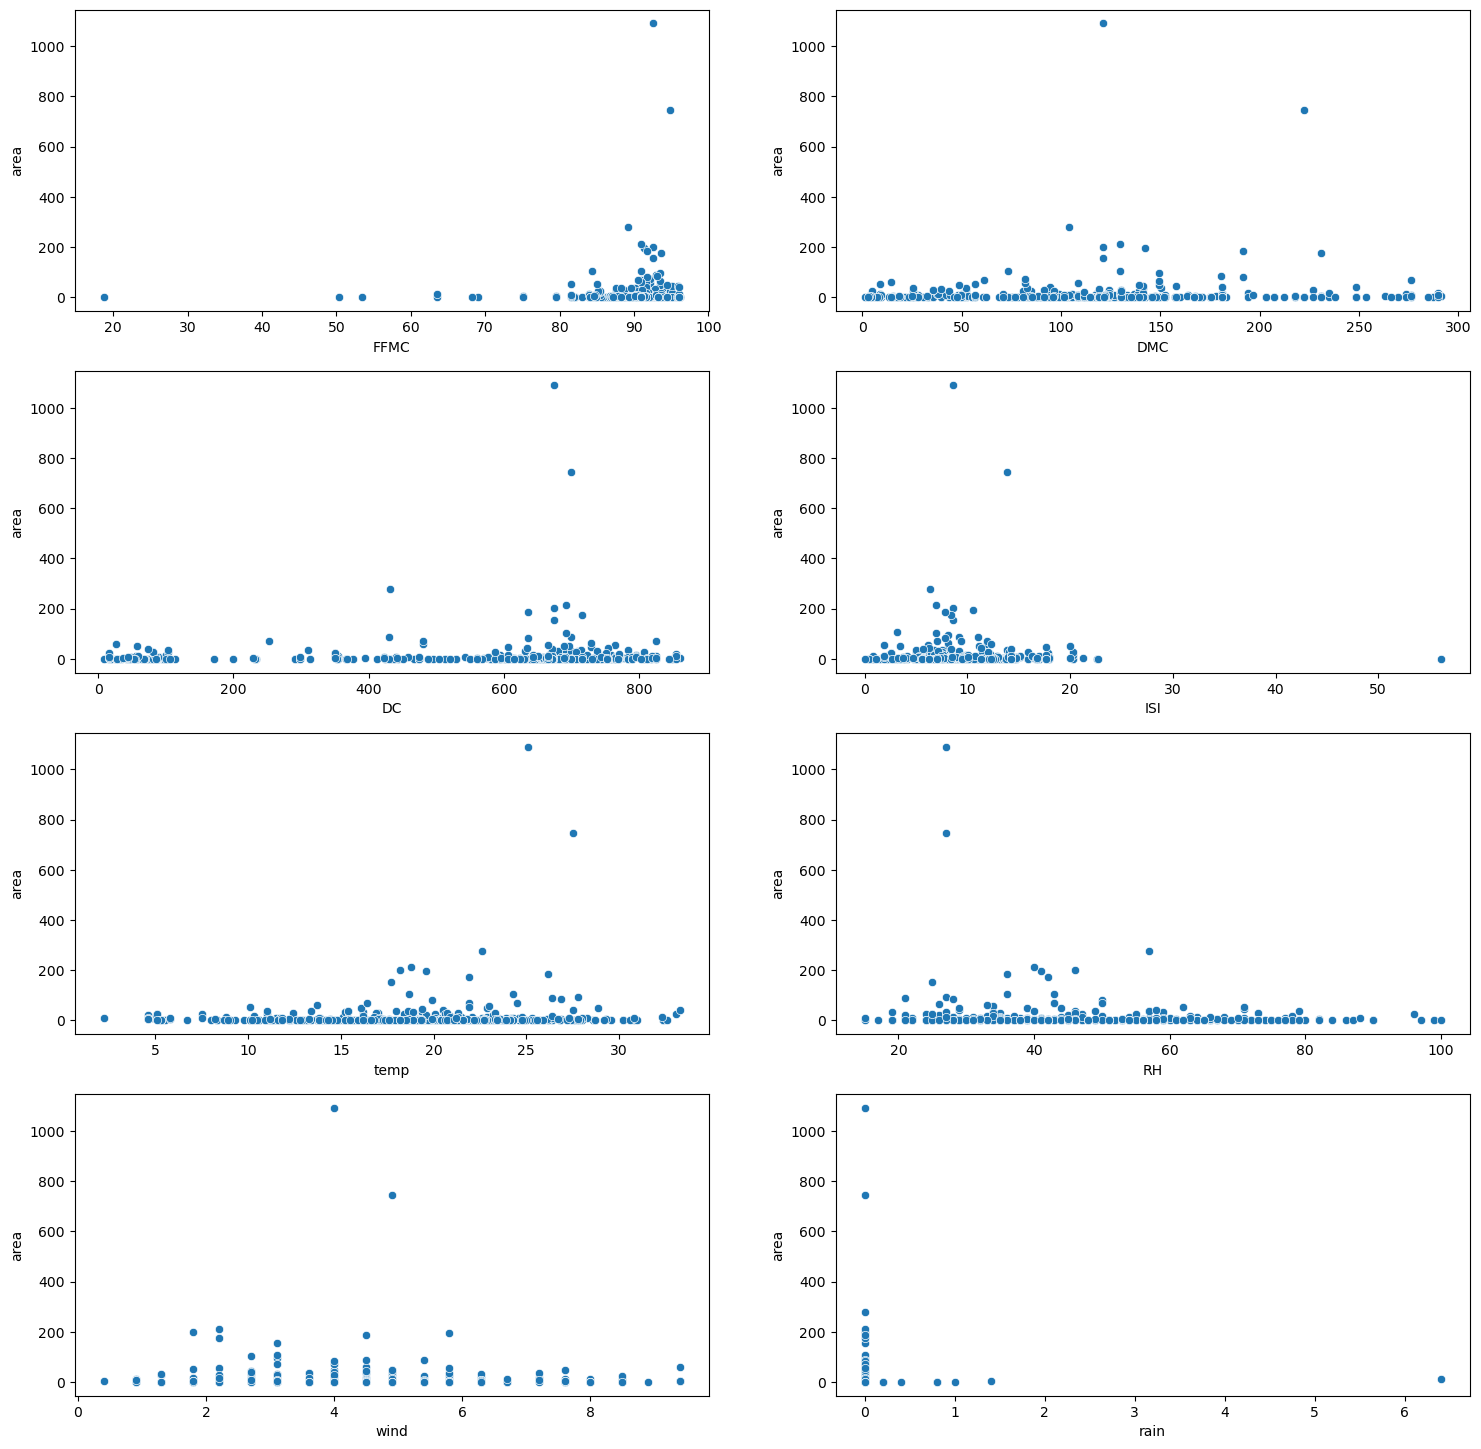

In [6]:
#crating a scatter plot for all the numerical columns vs. area
num_columns = fires.select_dtypes(include = [np.number]).columns.tolist()
num_columns.remove('area')

fig = plt.figure(figsize = (18,18))
for i,cl in enumerate(num_columns):
    ax = plt.subplot(4,2,i+1)
    sns.scatterplot(data = fires, x= cl, y = 'area', ax = ax)

plt.show()

still no meaningful trends are visible.

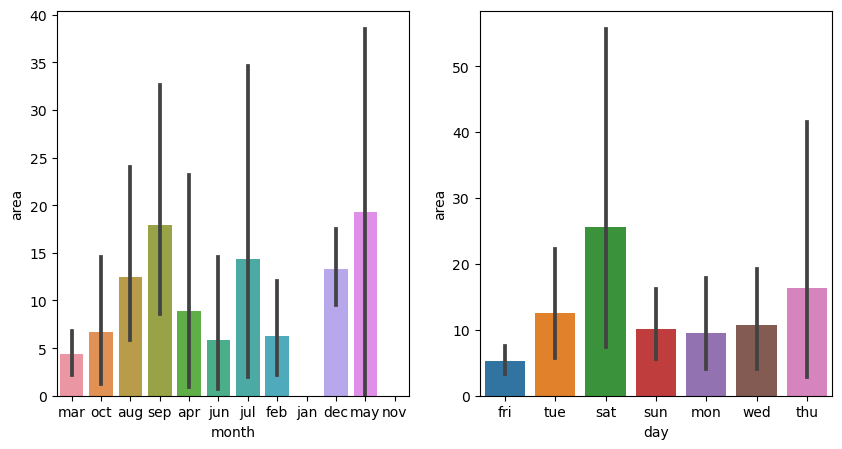

In [7]:
#finding the average fired area per weekday and month

fig = plt.figure(figsize = (10,5))
for i,cl in enumerate(['month', 'day']):
    ax = plt.subplot(1,2,i+1)
    sns.barplot(data = fires, x = cl, y = 'area', ax = ax)

plt.show()

On Saturdays and thurdays(during and a day before weekends) we see a rise in average area. 
Also, we see a rise during summer and in may. to keep our data simpler, we transform the month column to a new column that has only 0 and 1 values, while 1 shows summer. Also, turn the day column to show only whether it's a weekend day or not, while defining weekends as thursdays, saturdays and sundays:

In [8]:
summer = ['jun','july','aug']
fires['is_summer'] = fires['month'].apply(lambda x: 1 if x in summer else 0)
fires['is_weekend'] = fires['day'].apply(lambda x: 1 if x in ['sat','sun','thu'] else 0)

In [9]:
fires[['is_summer','is_weekend','area']].corr()['area']

is_summer    -0.011544
is_weekend    0.062118
area          1.000000
Name: area, dtype: float64

now, although we know that there is not a high correlation among the numerical features of our dataset and the target column, we try to visualize the outlires of numerical columns and replace them with some meaningful values.

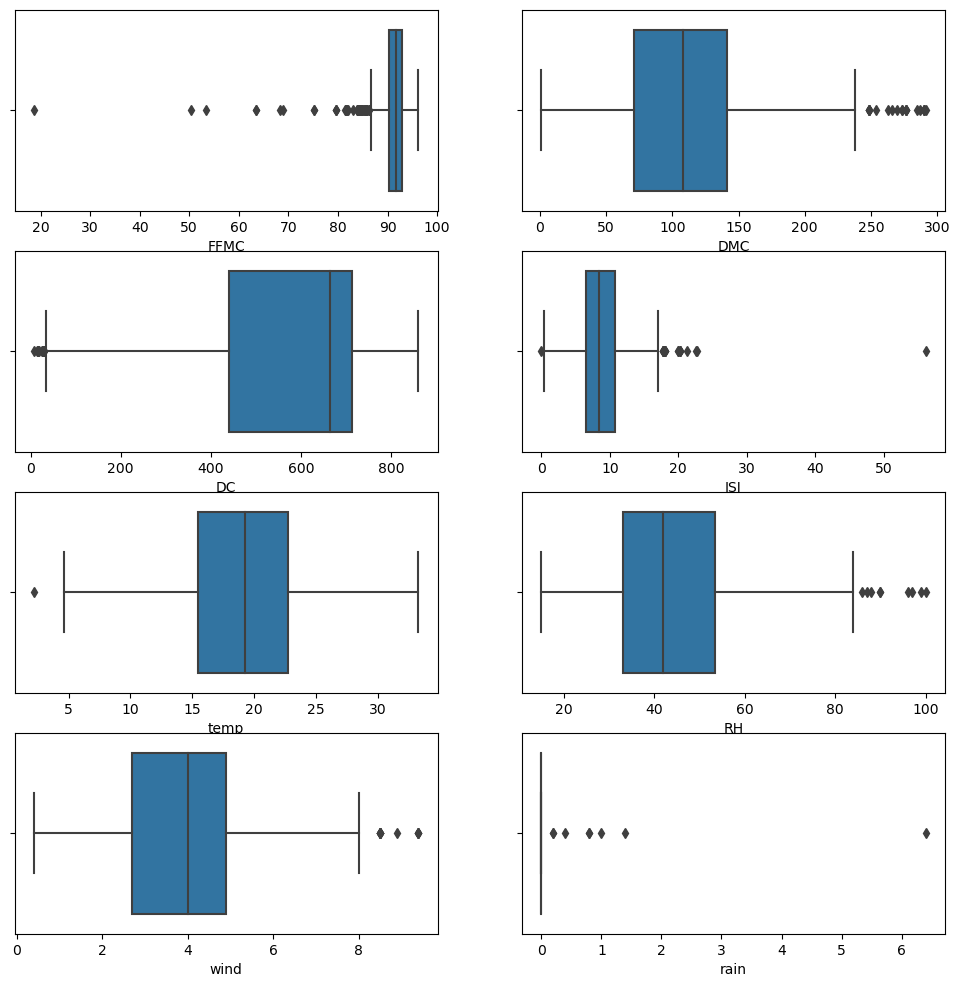

In [10]:
#creating a box plot for each numerical columns

fig = plt.figure(figsize = (12,12))

for i,cl in enumerate(num_columns):
    ax = plt.subplot(4,2,i+1)
    sns.boxplot(data = fires, x = cl, ax = ax)
plt.show()    

As we can see, we do have outlires in all numerical columns. At this step, we should handle the missing values in these columns and try to remove the outlires.

In [11]:
#replacing null values in numerical columns using the KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values = np.nan)
imputed = pd.DataFrame(data = imputer.fit_transform(fires[num_columns]), columns = num_columns)
imputed.info()
                       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    517 non-null    float64
 1   DMC     517 non-null    float64
 2   DC      517 non-null    float64
 3   ISI     517 non-null    float64
 4   temp    517 non-null    float64
 5   RH      517 non-null    float64
 6   wind    517 non-null    float64
 7   rain    517 non-null    float64
dtypes: float64(8)
memory usage: 32.4 KB


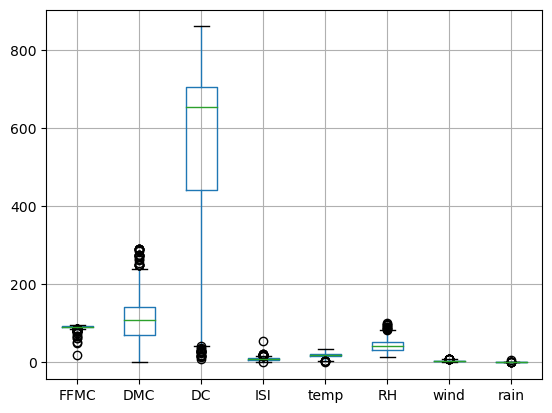

In [12]:
#examining our data again to visualize the outliers:
imputed.boxplot()
plt.show()

the boxplot viz. shows some outlires in each column. let's find the number of outliers in each feature using the **Quratiles**:

In [13]:
for cl in num_columns:
    quartiles = np.percentile(imputed[cl], [25,75])
    iqr = quartiles[1] - quartiles[0]
    upper_band = quartiles[1] + (1.5*iqr)
    lower_band = quartiles[0] - (1.5*iqr)
    count = sum((imputed[cl]>upper_band)|(imputed[cl]<lower_band))
    print(f"number of outliers in the {cl} column is {count}, equal to {count*100/imputed.shape[0]:.1f}% of data")

number of outliers in the FFMC column is 52, equal to 10.1% of data
number of outliers in the DMC column is 22, equal to 4.3% of data
number of outliers in the DC column is 19, equal to 3.7% of data
number of outliers in the ISI column is 23, equal to 4.4% of data
number of outliers in the temp column is 7, equal to 1.4% of data
number of outliers in the RH column is 10, equal to 1.9% of data
number of outliers in the wind column is 12, equal to 2.3% of data
number of outliers in the rain column is 8, equal to 1.5% of data


The highest number of outliers is found the FFMC columns. Since this metric is a specific terminology in the field, I'd rather to keep it in my model and do not remove any outliers as I don't know what is a reasonable range for each one of them.

**scaling and centering the features**

In [14]:
#turning the features into z scores:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(imputed)
scaled = pd.DataFrame(scaled, columns = imputed.columns)
scaled 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.809020,-1.339580,-1.858664,-0.859950,-0.586108,0.421332,1.527718,-0.073268
1,-0.007910,-0.500425,0.509881,-0.508478,-0.157437,-0.716287,-1.770254,-0.073268
2,-0.007910,-1.062918,-0.441658,-0.508478,-0.749908,-0.716287,-1.542808,-0.073268
3,0.192368,-1.227334,-1.927891,-0.003238,-1.847723,3.328580,-0.007545,0.603155
4,-0.244601,-0.942767,-1.826111,0.128564,-1.307528,3.454982,0.163040,-0.073268
...,...,...,...,...,...,...,...,...
512,-1.646544,-0.857398,0.495458,-1.562894,1.550274,-0.779488,-0.746746,-0.073268
513,-1.646544,-0.857398,0.495458,-1.562894,0.522162,1.685353,1.015964,-0.073268
514,-1.646544,-0.857398,0.495458,-1.562894,0.400183,1.622152,1.527718,-0.073268
515,0.683958,0.554368,0.285718,0.502003,1.166910,-0.147477,-0.007545,-0.073268


In [15]:
#adding the is_weekend and is_summer columns to our final dataframe:
final = pd.concat([scaled,fires['is_summer'],fires['is_weekend']], axis = 1)
final.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,is_summer,is_weekend
0,-0.809020,-1.339580,-1.858664,-0.859950,-0.586108,0.421332,1.527718,-0.073268,0,0
1,-0.007910,-0.500425,0.509881,-0.508478,-0.157437,-0.716287,-1.770254,-0.073268,0,0
2,-0.007910,-1.062918,-0.441658,-0.508478,-0.749908,-0.716287,-1.542808,-0.073268,0,1
3,0.192368,-1.227334,-1.927891,-0.003238,-1.847723,3.328580,-0.007545,0.603155,0,0
4,-0.244601,-0.942767,-1.826111,0.128564,-1.307528,3.454982,0.163040,-0.073268,0,1


in this final step, since we are going to use a linear regression model as our base model, we should check the distribution of our target column and transform it if it is necessary:

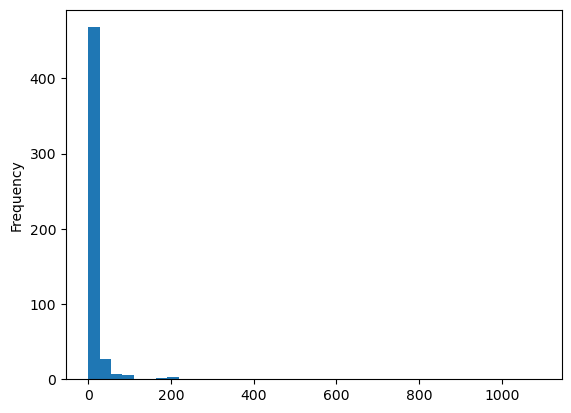

In [16]:
#visualizing the dist. of area column:
fires['area'].plot.hist(bins = 40)
plt.show()

A highly right-skewed target column. we should tranform it to a log scale to make it more smooth and s-shaped. since this column include a lot of 0 values ind the log(0) is undefined, we can add 1 to this column to prevent any errors:

<AxesSubplot:ylabel='Frequency'>

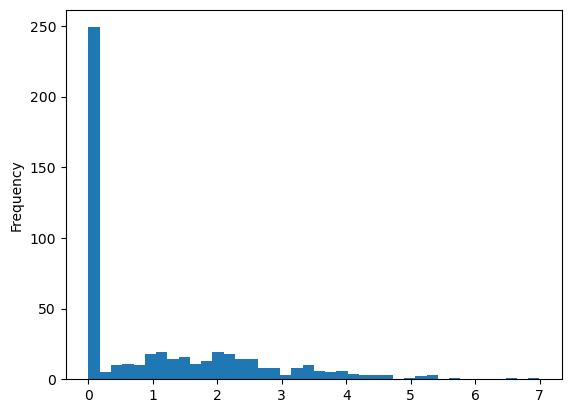

In [17]:
fires['log_area'] = np.log(fires['area'] + 1 )
fires['log_area'].plot.hist(bins = 40)

We can see that performing a log-transformation doesn't produce a bell-shaped distribution, but it does spread out the data a bit more. It's probably the case that most fires do not appreciably damage the forest, so we would be mistaken in removing all of these rows

## Subset Selection

In the previous step, we didn't find a meaningful correlation among the numerical columns with the target column(area). In this step, we try to find out whether we can build strong predictive models using these features or not. We test 2,4,6 and 10(all) set of features to find the best possible set of features.

In [18]:
#creating the X and y sets
y = fires['log_area']
X = final
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

#building the baseline model
lm = LinearRegression()

num_features = [2,4,6,8]
forward_features = {}
for i in num_features:
    #creating and instances using forward feature selection
    forward = SequentialFeatureSelector(n_features_to_select = i, cv = 5, 
                                        estimator = lm, n_jobs = -1, direction = 'forward')
    forward.fit(X,y)
    #finding feature names
    features = forward.get_feature_names_out().tolist()
    cv = cross_val_score(lm,X[features],y, scoring = 'neg_mean_squared_error').mean()
    forward_features[i] = [features, round(cv*-1,2)]
    
print(forward_features)



{2: [['FFMC', 'is_weekend'], 2.17], 4: [['FFMC', 'DC', 'wind', 'is_weekend'], 2.18], 6: [['FFMC', 'DC', 'ISI', 'RH', 'wind', 'is_weekend'], 2.21], 8: [['FFMC', 'DMC', 'DC', 'ISI', 'RH', 'wind', 'is_summer', 'is_weekend'], 2.26]}


Based on the selected features by forward selection method, FFMC, is_weekend and DC are the most impactful features on predicting log_area

In [19]:
#creating and instances using backward feature selection
num_features = [2,4,6,8]
backward_features = {}
for i in num_features:
    backward = SequentialFeatureSelector(n_features_to_select = i, cv = 5, 
                                        estimator = lm, n_jobs = -1, direction = 'backward')
    backward.fit(X,y)
    #finding feature names
    features = backward.get_feature_names_out().tolist()
    cv = cross_val_score(lm,X[features],y, scoring = 'neg_mean_squared_error').mean()
    backward_features[i] = [features, round(cv*-1,2)]

    
print(backward_features)


{2: [['FFMC', 'DC'], 2.18], 4: [['FFMC', 'DC', 'wind', 'is_weekend'], 2.18], 6: [['FFMC', 'DC', 'ISI', 'RH', 'wind', 'is_weekend'], 2.21], 8: [['FFMC', 'DMC', 'DC', 'ISI', 'RH', 'wind', 'is_summer', 'is_weekend'], 2.26]}


Based on the selected features by backward selection method, FFMC, DC, wind and Is_weekend are the most impactful features on predicting log_area

The linear model built using forward method, with **FFMC** and **is_weekend** features has the lowest MSE among other models(2.17)

## Regularization

At this step, we try to use ridge and lasso models to penalize model on high-values of coefficients, resulting in some sort of feature selection. 

In [20]:
#using ridge and lasso models to push down coefficients to zero, resulting in some sort of regularization
from sklearn.linear_model import RidgeCV, LassoCV
ridge = RidgeCV(alphas = np.linspace(1, 10000, num=1000))
lasso = LassoCV(alphas = np.linspace(1, 10000, num=1000))

#fitting models
ridge.fit(X,y)
lasso.fit(X,y)

#finding coefficients and alpha value
#alpha value is used in the loss function of these models to push down coeffs. into zero
ridge_alpha = ridge.alpha_
lasso_alpha = lasso.alpha_

ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

print("Ridge chosen alpha parameter: ", ridge_alpha)
print("LASSO chosen alpha parameter: ", lasso_alpha)

print("Ridge coefficients: ", ridge_coefs)
print("LASSO coefficients: ", lasso_coefs)


Ridge chosen alpha parameter:  1632.4684684684685
LASSO chosen alpha parameter:  10000.0
Ridge coefficients:  [ 0.01144845  0.01774644  0.01722131 -0.00877458  0.01188653 -0.01465092
  0.02400335  0.00730583 -0.01174624  0.00323439]
LASSO coefficients:  [ 0.  0.  0. -0.  0. -0.  0.  0. -0.  0.]


/Users/sajad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


The lasso alpha is located in the upper boundry of our spectrum, so we should increase it. the coefs of ridge function are shown below:

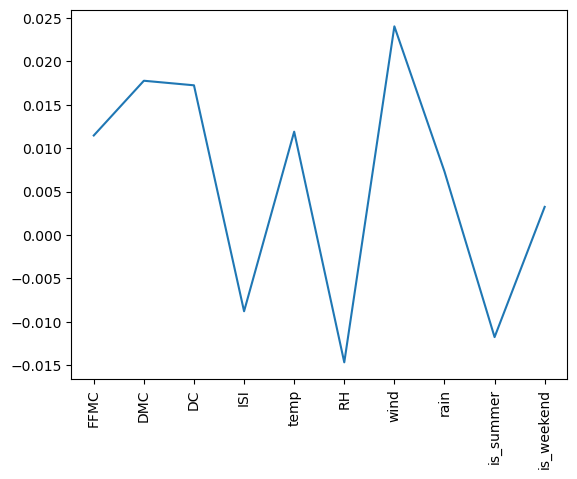

In [21]:
plt.plot(X.columns, ridge_coefs)
plt.xticks(rotation = 90)
plt.show()

Based on the ridge model, wind and RH have the largest predictive coefficients. 

In [22]:
#finding a better class for the lasso model
lasso_alpha = LassoCV()
lasso_alpha.fit(X,y)
print(lasso_alpha.alpha_)
print(lasso_alpha.coef_)

0.0901078244197452
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  2.74871465e-17  0.00000000e+00
 -0.00000000e+00  0.00000000e+00]


A lesson learn, while we tried many alpha values in the previous step, it seems that using the default values of the lasso model could work better than ours in this context.

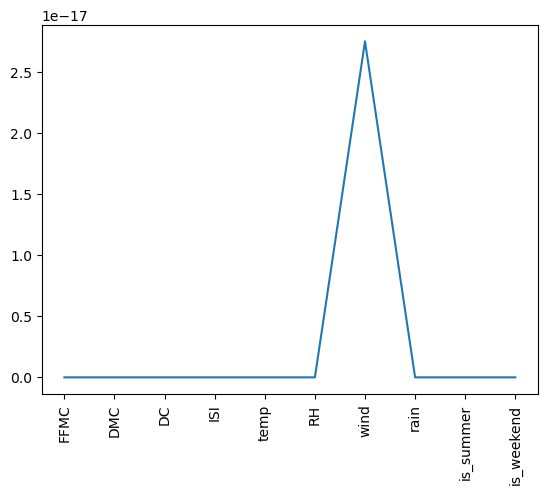

In [23]:
#visualizing the coefficients of the final lasso model:
plt.plot(X.columns, lasso_alpha.coef_)
plt.xticks(rotation = 90)
plt.show()

Using the feature selection functionality of the lasso model, we can see that the only impactful metric is wind.

In [24]:
#finding the MSE of the final lasso and ridge models:
ridge_mse = cross_val_score(ridge, X,y, scoring = 'neg_mean_squared_error').mean()
lasso_mse = cross_val_score(lasso_alpha, X,y, scoring = 'neg_mean_squared_error').mean()
print(f"the MSE of Ridge model is: {np.round(ridge_mse*-1,2)}\nthe MSE of lasso model is: {np.round(lasso_mse*-1,2)}")

/Users/sajad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/sajad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/sajad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/sajad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/sajad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


the MSE of Ridge model is: 2.29
the MSE of lasso model is: 2.24


## Going beyond linear models

At this stage, we use Polynomial and Spline models to find if we can find a better predictive mdoel using this more complex model.

In [25]:
#transforming X variables into cubic polynominals
from sklearn.preprocessing import SplineTransformer

# testing different number of knots to find the best spline
mse_list = []
for n in range(2,11):
    spline = SplineTransformer(degree = 2, n_knots = n )
    X_spline = spline.fit_transform(X)
    #using a linear regression model as the main estimator
    mse = cross_val_score(LinearRegression(), X_spline,y, 
                          scoring = 'neg_mean_squared_error').mean()
    mse_list.append(np.round(mse*-1))
    
print(mse_list)   

[71.0, 1.053344336296663e+23, 6.197114865586228e+23, 1.0848652821729326e+25, 1.3184945151742588e+25, 2.1688770641705253e+24, 6.0461926845033136e+25, 6.901634825454352e+24, 1.0903416883126836e+23]


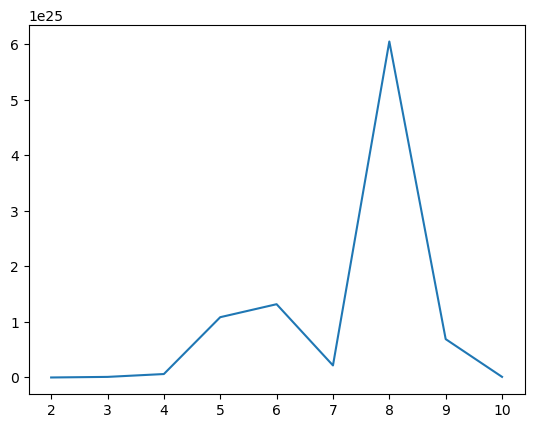

In [26]:
#showing the results
plt.plot(list(range(2,11)), mse_list)
plt.show()

using two knots and a quadratic spline model has the lowest MSE(72), which is still highly more than the forward 

## Conclusion

Among our candidate models, the forward selection model using two features(FFMC and is_weekend) performs the best, with an average MSE of 2.17. However, note that this is on the log-scale, so this suggests that the predictions are off by a magnitude of about 2. On the surface, this suggests that the models overall are not good predictors, as we saw in the beginning of this project(just by looking at the correlation values). spline models made worse errors, starting from 70, while ridge and lasso model performed not better than the baseline simple linear model. As a result:

- The final best predictor model is a simple linear model using FFMC and is_weekend features.
- The mentioned model can't provide us with highly reliable predictions.

